# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/traffic-signs-data/train.p'
validation_file= '../data/traffic-signs-data/valid.p'
testing_file = '../data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
print("\n\nTrain labels type:", type(y_train), "\n\n")
print("shape of training labels: ", y_train.shape)
print("shape of testing labels: ", y_test.shape)
print("shape of validation labels: ", y_valid.shape)
all_y = np.concatenate([y_train, y_valid, y_test])
unique_y = np.unique(all_y)
sorted_unique_y = np.sort(unique_y)
n_classes = unique_y.shape

print("\n\n")


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("classes are: ", sorted_unique_y)



Train labels type: <class 'numpy.ndarray'> 


shape of training labels:  (34799,)
shape of testing labels:  (12630,)
shape of validation labels:  (4410,)



Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = (43,)
classes are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv
import pprint

pp = pprint.PrettyPrinter()

class_dict = dict()
class_list = None

with open('signnames.csv', newline='') as file:
    class_list = list(csv.reader(file))
    
for pair in class_list:
    try:
        class_dict[int(pair[0])] = pair[1]
    except:
        print("could not use ", pair[0], " as an integer key")


pp.pprint(class_dict)

could not use  ClassId  as an integer key
{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn l

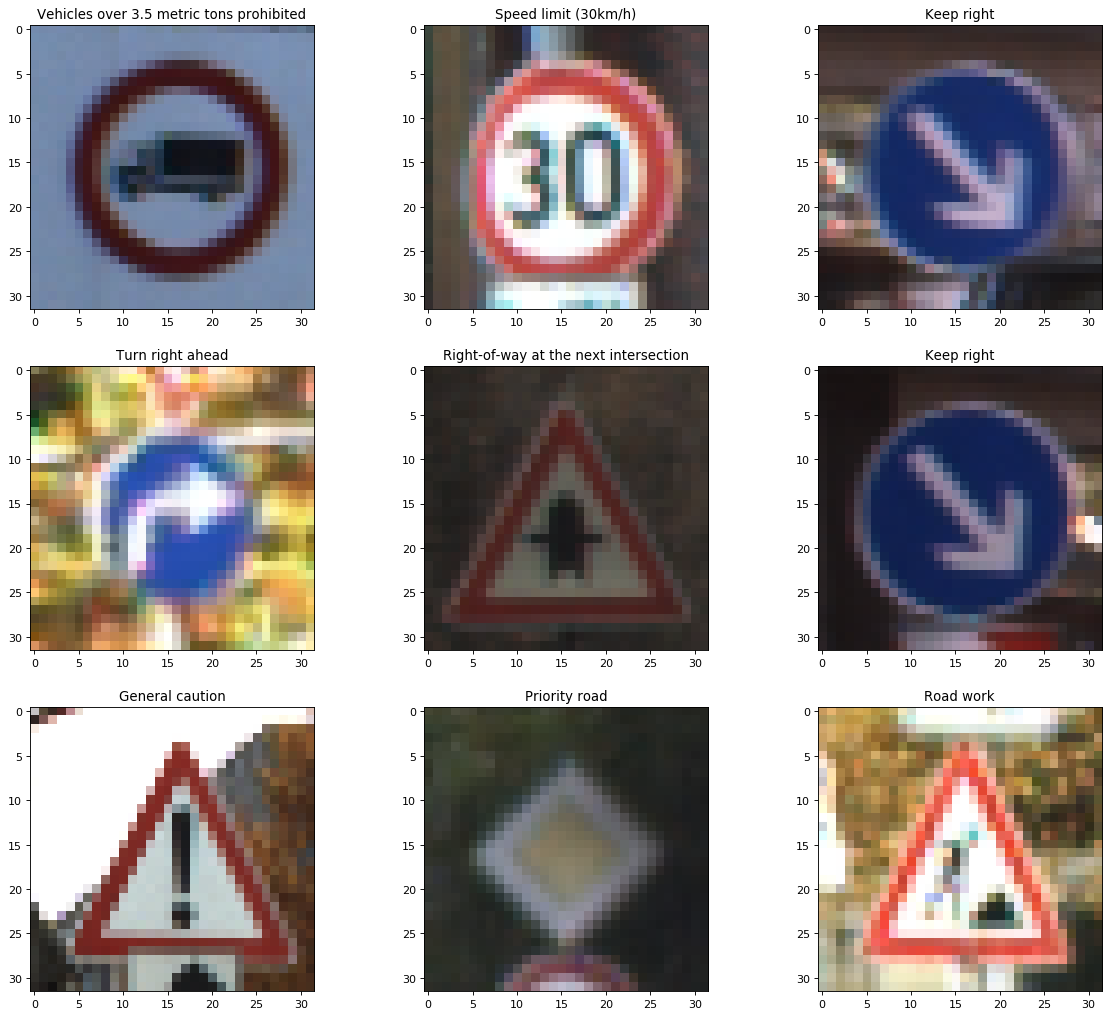

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

label_dist_train = np.zeros(n_classes, dtype=int)
label_dist_valid = np.zeros(n_classes, dtype=int)
label_dist_test = np.zeros(n_classes, dtype=int)

for i in range(43): #labels are 0 through 42
    label_dist_train[i] = (y_train == i).sum()
    
for i in range(43): #labels are 0 through 42
    label_dist_test[i] = (y_test == i).sum()
    
for i in range(43): #labels are 0 through 42
    label_dist_valid[i] = (y_valid == i).sum()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    
sp = 331
    
for i in range(9):
    plt.subplot(sp+i)
    plt.imshow(X_test[i,:,:,:])
    plt.title(class_dict[y_test[i]])

Text(0.5,1,'Normalized Number of Samples by Class ID')

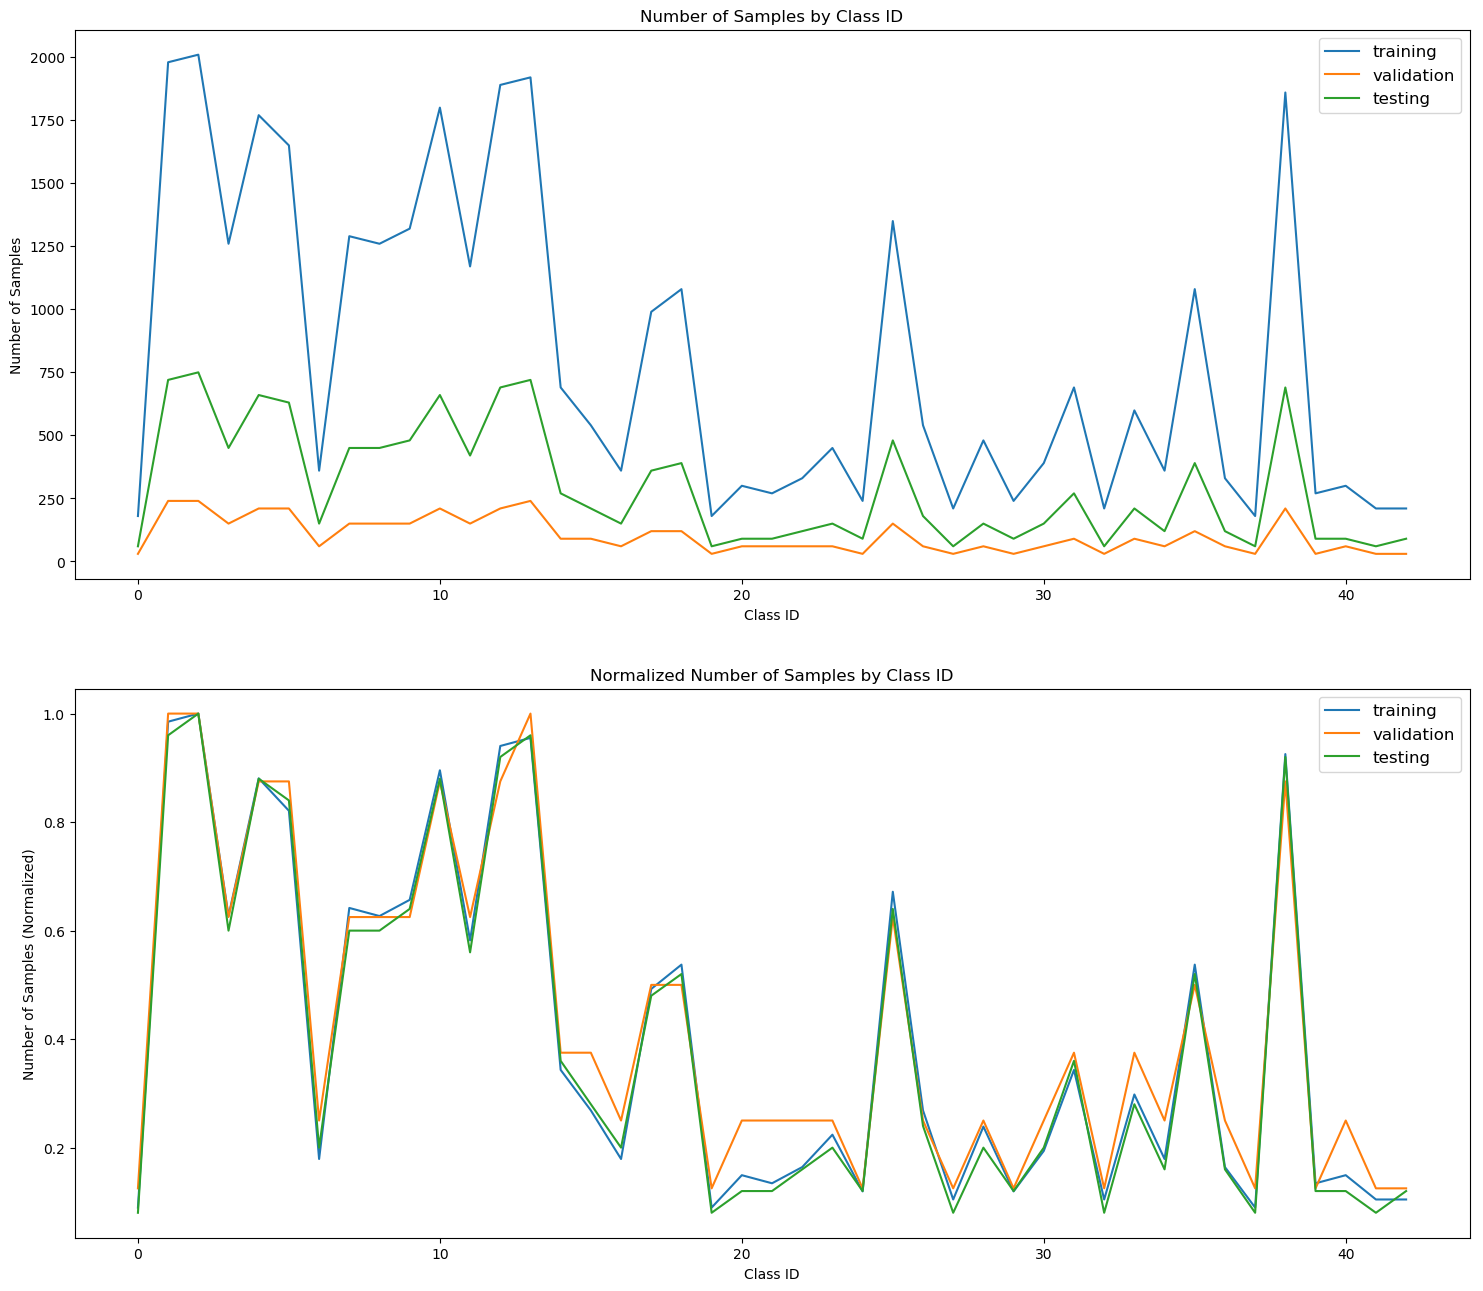

In [5]:
fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')
    
plt.subplot(211)

plt.plot(label_dist_train, label='training')
plt.plot(label_dist_valid, label='validation')
plt.plot(label_dist_test, label='testing')

plt.xlabel("Class ID")
plt.ylabel("Number of Samples")

plt.title("Number of Samples by Class ID")

plt.legend(loc='upper right', fontsize=12)

plt.subplot(212)

plt.plot(label_dist_train / np.max(label_dist_train), label='training')
plt.plot(label_dist_valid / np.max(label_dist_valid), label='validation')
plt.plot(label_dist_test / np.max(label_dist_test), label='testing')

plt.xlabel("Class ID")
plt.ylabel("Number of Samples (Normalized)")
plt.legend(loc='upper right', fontsize=12)

plt.title("Normalized Number of Samples by Class ID")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

unprocessed image data type:  uint8
old std dev:  66.133934
new std dev:  1.0000001
old std dev:  68.05853
new std dev:  1.0000005
old std dev:  66.74195
new std dev:  1.0000002
grey image data type:  float32
pp data type:  float32
'first image data (train): '
array([[25.783, 24.783, 24.669, ..., 28.74 , 27.968, 28.082],
       [26.783, 25.37 , 25.37 , ..., 28.74 , 27.854, 27.669],
       [26.598, 25.37 , 25.071, ..., 28.74 , 27.854, 27.669],
       ...,
       [24.783, 25.783, 26.381, ..., 24.783, 24.968, 25.854],
       [24.495, 25.495, 26.68 , ..., 24.783, 24.968, 24.854],
       [24.794, 25.794, 26.278, ..., 24.669, 23.968, 22.968]],
      dtype=float32)
'first image data (train): '
array([[0.3898604 , 0.37473956, 0.37301576, ..., 0.43457267, 0.4228994 ,
        0.42462316],
       [0.40498123, 0.3836155 , 0.3836155 , ..., 0.43457267, 0.4211756 ,
        0.41837826],
       [0.40218383, 0.3836155 , 0.37909433, ..., 0.43457267, 0.4211756 ,
        0.41837826],
       ...,
       [0.

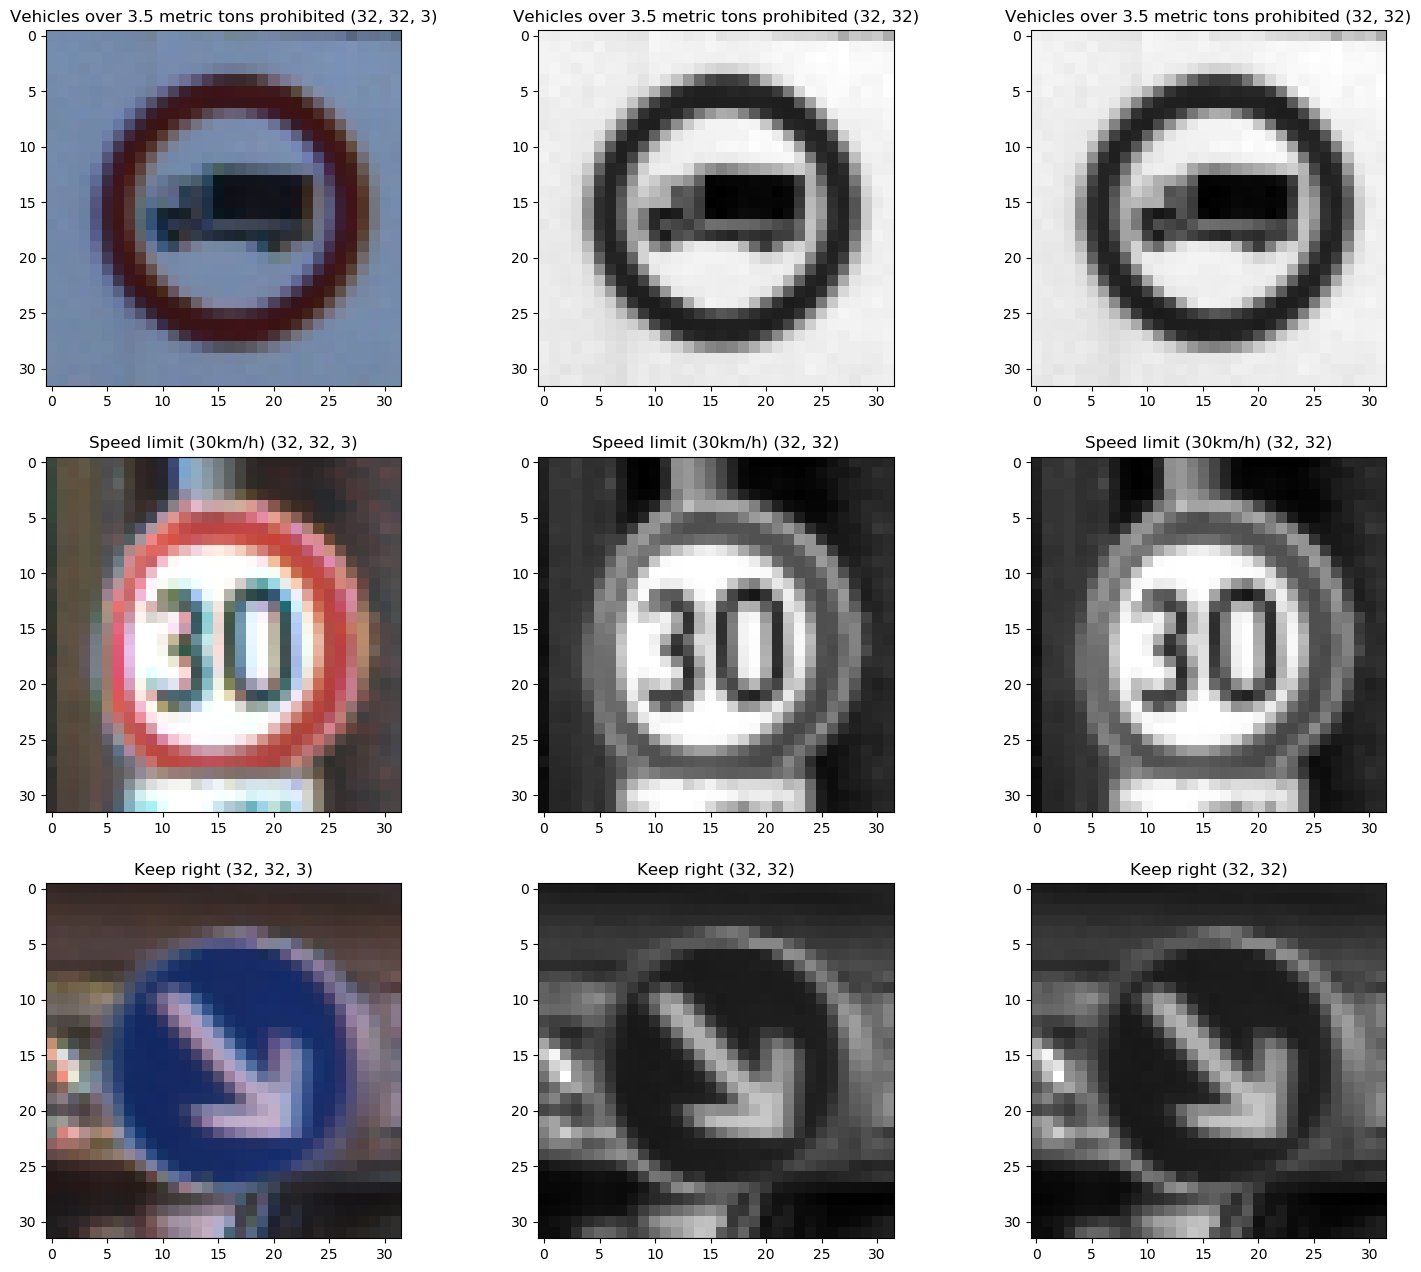

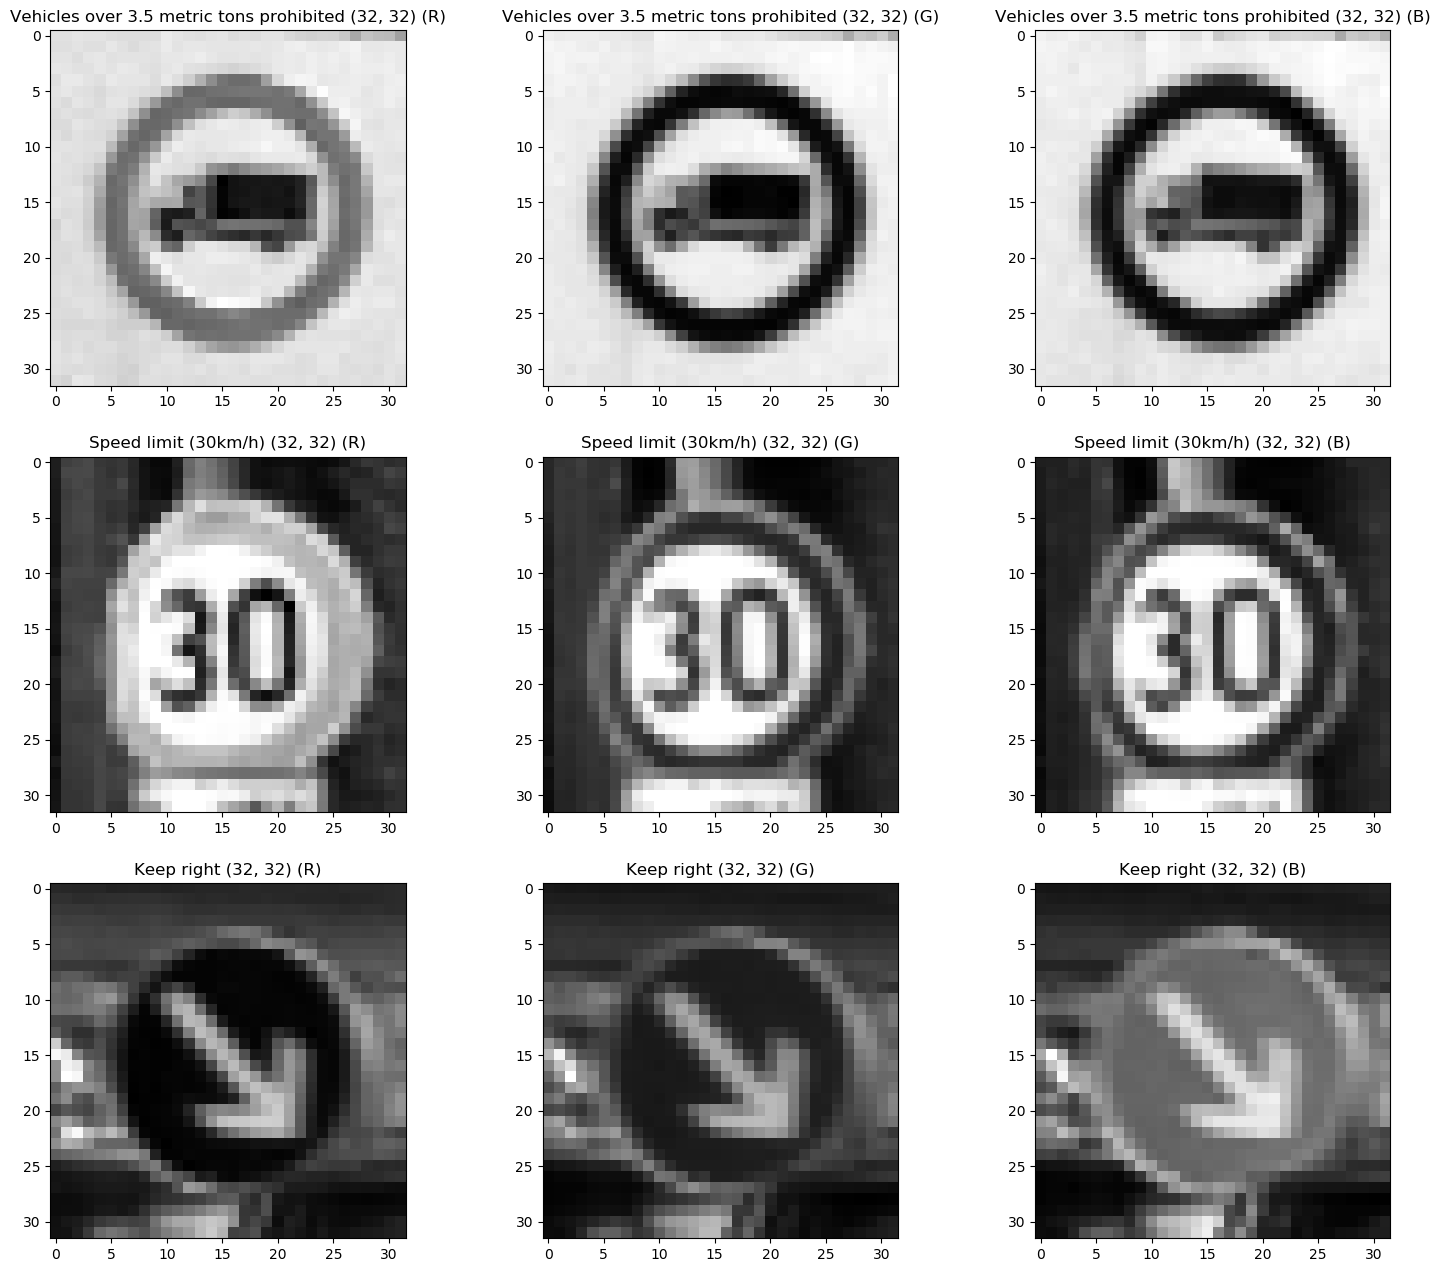

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#data normalization

#convert all images to greyscale

def make_grey(image_data):
    # just taking the average doesn't work well - the resultant greyscale images look bad
    # matlab documentation here: https://www.mathworks.com/help/matlab/ref/rgb2gray.html
    # indicates that this is the way to calculate luminance per Rec.ITU-R BT.601-7
    return ((0.2990 * image_data[:,:,:,0] + 0.5870 * image_data[:,:,:,1] + 0.1140 * image_data[:,:,:,2]) ).astype(np.float32)

def preprocess(image_data):
    image_data_min = np.min(image_data)
    image_data_max = np.max(image_data)
    image_data_mean = np.mean(image_data)
    image_data_stddev = np.std(image_data)
    zero_mean = image_data - image_data_mean  #has zero mean
    new_std_dev = 1.0
    stddev_adj = image_data * (new_std_dev / image_data_stddev)
    print("old std dev: ", image_data_stddev)
    print("new std dev: ", np.std(stddev_adj))
    return stddev_adj


print("unprocessed image data type: ", X_train.dtype)

X_train_grey = make_grey(X_train)
X_valid_grey = make_grey(X_valid)
X_test_grey = make_grey(X_test)

X_train_pp = preprocess(X_train_grey)
X_valid_pp = preprocess(X_valid_grey)
X_test_pp = preprocess(X_test_grey)

print("grey image data type: ", X_train_grey.dtype)
print("pp data type: ", X_train_pp.dtype)

pp.pprint("first image data (train): ")
pp.pprint(X_train_grey[0,:,:])

pp.pprint("first image data (train): ")
pp.pprint(X_train_pp[0,:,:])

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

sp = 331
    
for i in range(3):
    plt.subplot(sp+3*i)  #plot the colour image
    plt.imshow(X_test[i,:,:])
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:].shape))
    
    plt.subplot(sp+3*i+1)  #plot the greyscale
    plt.imshow(X_test_grey[i,:,:], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test_grey[i,:,:].shape))
    
    plt.subplot(sp+3*i+2)  #plot the greyscale + normalized data (should look the same here but work better for training)
    plt.imshow(X_test_pp[i,:,:], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test_pp[i,:,:].shape))

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

sp = 331
    
for i in range(3):
    plt.subplot(sp+3*i)  #plot the red channel
    plt.imshow(X_test[i,:,:,0], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,0].shape) + " (R)")
    
    plt.subplot(sp + 3*i + 1)  #plot the green channel
    plt.imshow(X_test[i,:,:,1], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,1].shape) + " (G)")
    
    plt.subplot(sp + 3*i + 2)  #plot the green channel
    plt.imshow(X_test[i,:,:,2], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,2].shape) + " (B)")


### Model Architecture

In [58]:
import tensorflow as tf

tf.set_random_seed(1)

### Define your architecture here.
### Feel free to use as many code cells as needed.

def get_network(x):
    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)
    
    fc0b   = tf.contrib.layers.flatten(conv1)
    
    print("fc0 dtype:", fc0.dtype )
    print("fc0b dtype:", fc0b.dtype )
    
    fc0c = fc0 #tf.concat([fc0, fc0b], 1)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*16 + 14*14*6*0, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0c, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 400.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 400), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(400))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2B_W = tf.Variable(tf.truncated_normal(shape=(400, 600), mean = mu, stddev = sigma))
    fc2B_b  = tf.Variable(tf.zeros(600))
    fc2B    = tf.matmul(fc2, fc2B_W) + fc2B_b
    
    
    
    fc2C_W = tf.Variable(tf.truncated_normal(shape=(600, 400), mean = mu, stddev = sigma))
    fc2C_b  = tf.Variable(tf.zeros(400))
    fc2C    = tf.matmul(fc2B, fc2C_W) + fc2C_b

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    fc3 = tf.matmul(fc2C, fc3_W) + fc3_b
    
    drop_out = tf.nn.dropout(fc3, keep_prob)
    
    logits = drop_out

    return logits
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [59]:
X = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = get_network(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

fc0 dtype: <dtype: 'float32'>
fc0b dtype: <dtype: 'float32'>


In [60]:
from sklearn.utils import shuffle

In [61]:
def calc_accuracy(batch_size, features, labels):
    
    sess = tf.get_default_session()
    
    total_accuracy = 0
    
    for offset in range(0, len(features), batch_size):
        end = offset + batch_size
        batch_x, batch_y = features[offset:end], labels[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
    nn_accuracy = total_accuracy / len(features)
    
    return nn_accuracy

def train_and_validate(num_epochs, batch_size, train_data, train_labels, valid_data, valid_labels ):

    print('num training examples: ', len(train_data), " ", len(train_labels))
    print('num validation examples: ', len(valid_data), " ", len(valid_labels))
    
    print('training data min/max: ', np.min(train_data), "/", np.max(train_data))
    print('training data min/max: ', np.min(valid_data), "/", np.max(valid_data))
    
    valid_accuracies = []
    train_accuracies = []
    
    with tf.Session() as sess:
        
        init = tf.global_variables_initializer()
        sess.run(init)

        for i in range(num_epochs):
            print("starting epoch {} ...".format(i+1))
            features, labels = shuffle(train_data, train_labels)
            for offset in range(0, n_train, batch_size):
                end = offset + batch_size
                batch_x, batch_y = train_data[offset:end], train_labels[offset:end]
                sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 0.5})


            #calculate accuracy on the validation set
            print("finished training, testing on validation set...")

            validation_accuracy = calc_accuracy(batch_size, valid_data, valid_labels)
            
            valid_accuracies.append(validation_accuracy)

            print("finished validation set testing, testing on training set...")

            training_accuracy = calc_accuracy(batch_size, train_data, train_labels)
            
            train_accuracies.append(training_accuracy)


            print("finished epoch {} ...".format(i+1))
            print("Validation Accuracy = {:.6f}".format(validation_accuracy))
            print("Training Accuracy = {:.6f}".format(training_accuracy))
            print()
            
        

        saver.save(sess, './traff_sign_classifier')
        print("Model saved")
        
        return valid_accuracies, train_accuracies


In [62]:
num_epochs = 2000
batch_size = 128
        
        
X_train_pp = np.reshape(X_train_pp, (X_train_pp.shape[0], X_train_pp.shape[1], X_train_pp.shape[2], 1))
X_valid_pp = np.reshape(X_valid_pp, (X_valid_pp.shape[0], X_valid_pp.shape[1], X_valid_pp.shape[2], 1))
X_test_pp = np.reshape(X_test_pp, (X_test_pp.shape[0], X_test_pp.shape[1], X_test_pp.shape[2], 1))

valid_accuracies, train_accuracies = train_and_validate(num_epochs, batch_size, X_train_pp, y_train, X_valid_pp, y_valid)

#try it on the mnist data

# from tensorflow.examples.tutorials.mnist import input_data

# mnist = tf.examples.tutorials.mnist.input_data.read_data_sets("MNIST_data/", reshape=False)

# mnist_X_train, mnist_y_train           = mnist.train.images, mnist.train.labels
# mnist_X_validation, mnist_y_validation = mnist.validation.images, mnist.validation.labels
# mnist_X_test, mnist_y_test             = mnist.test.images, mnist.test.labels

# print("mnist type: ", mnist_X_train.dtype)
# print("mnist shape: ", mnist_X_train.shape)

# mnist_X_train      = np.pad(mnist_X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# mnist_X_validation = np.pad(mnist_X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# mnist_X_test       = np.pad(mnist_X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# train_and_validate(num_epochs, batch_size, mnist_X_train, mnist_y_train, mnist_X_validation, mnist_y_validation)

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



num training examples:  34799   34799
num validation examples:  4410   4410
training data min/max:  0.051607396 / 3.8558118
training data min/max:  0.06651627 / 3.746775
starting epoch 1 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1 ...
Validation Accuracy = 0.054422
Training Accuracy = 0.058565

starting epoch 2 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 2 ...
Validation Accuracy = 0.064626
Training Accuracy = 0.086842

starting epoch 3 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 3 ...
Validation Accuracy = 0.086395
Training Accuracy = 0.101986

starting epoch 4 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 4 ...
Validation Accuracy = 0.085488
Training Accurac

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 39 ...
Validation Accuracy = 0.416100
Training Accuracy = 0.434150

starting epoch 40 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 40 ...
Validation Accuracy = 0.470975
Training Accuracy = 0.500675

starting epoch 41 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 41 ...
Validation Accuracy = 0.466893
Training Accuracy = 0.489612

starting epoch 42 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 42 ...
Validation Accuracy = 0.449206
Training Accuracy = 0.468950

starting epoch 43 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 43 ...
Validation Accurac

finished epoch 77 ...
Validation Accuracy = 0.688662
Training Accuracy = 0.777120

starting epoch 78 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 78 ...
Validation Accuracy = 0.731973
Training Accuracy = 0.821317

starting epoch 79 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 79 ...
Validation Accuracy = 0.681406
Training Accuracy = 0.761947

starting epoch 80 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 80 ...
Validation Accuracy = 0.674830
Training Accuracy = 0.753700

starting epoch 81 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 81 ...
Validation Accuracy = 0.660998
Training Accuracy = 0.735194

starting epoch 82 ...
finished training, testing on validation se

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 116 ...
Validation Accuracy = 0.841270
Training Accuracy = 0.933216

starting epoch 117 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 117 ...
Validation Accuracy = 0.849206
Training Accuracy = 0.941780

starting epoch 118 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 118 ...
Validation Accuracy = 0.852834
Training Accuracy = 0.947297

starting epoch 119 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 119 ...
Validation Accuracy = 0.847846
Training Accuracy = 0.944855

starting epoch 120 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 120 ...
Validatio

finished epoch 154 ...
Validation Accuracy = 0.902948
Training Accuracy = 0.989626

starting epoch 155 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 155 ...
Validation Accuracy = 0.914059
Training Accuracy = 0.997442

starting epoch 156 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 156 ...
Validation Accuracy = 0.918821
Training Accuracy = 0.998649

starting epoch 157 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 157 ...
Validation Accuracy = 0.922676
Training Accuracy = 0.999080

starting epoch 158 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 158 ...
Validation Accuracy = 0.920635
Training Accuracy = 0.999138

starting epoch 159 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 193 ...
Validation Accuracy = 0.934240
Training Accuracy = 1.000000

starting epoch 194 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 194 ...
Validation Accuracy = 0.936508
Training Accuracy = 1.000000

starting epoch 195 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 195 ...
Validation Accuracy = 0.935601
Training Accuracy = 1.000000

starting epoch 196 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 196 ...
Validation Accuracy = 0.935374
Training Accuracy = 1.000000

starting epoch 197 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 197 ...
Validatio

finished epoch 231 ...
Validation Accuracy = 0.939456
Training Accuracy = 1.000000

starting epoch 232 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 232 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 233 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 233 ...
Validation Accuracy = 0.939456
Training Accuracy = 1.000000

starting epoch 234 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 234 ...
Validation Accuracy = 0.938776
Training Accuracy = 1.000000

starting epoch 235 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 235 ...
Validation Accuracy = 0.937868
Training Accuracy = 1.000000

starting epoch 236 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 270 ...
Validation Accuracy = 0.939002
Training Accuracy = 1.000000

starting epoch 271 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 271 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 272 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 272 ...
Validation Accuracy = 0.936735
Training Accuracy = 1.000000

starting epoch 273 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 273 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 274 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 274 ...
Validatio

finished epoch 308 ...
Validation Accuracy = 0.933333
Training Accuracy = 1.000000

starting epoch 309 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 309 ...
Validation Accuracy = 0.933560
Training Accuracy = 1.000000

starting epoch 310 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 310 ...
Validation Accuracy = 0.933787
Training Accuracy = 1.000000

starting epoch 311 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 311 ...
Validation Accuracy = 0.933560
Training Accuracy = 1.000000

starting epoch 312 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 312 ...
Validation Accuracy = 0.933333
Training Accuracy = 1.000000

starting epoch 313 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 347 ...
Validation Accuracy = 0.927891
Training Accuracy = 0.999741

starting epoch 348 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 348 ...
Validation Accuracy = 0.919501
Training Accuracy = 0.998793

starting epoch 349 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 349 ...
Validation Accuracy = 0.909977
Training Accuracy = 0.996063

starting epoch 350 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 350 ...
Validation Accuracy = 0.932880
Training Accuracy = 0.999483

starting epoch 351 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 351 ...
Validatio

finished epoch 385 ...
Validation Accuracy = 0.937188
Training Accuracy = 1.000000

starting epoch 386 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 386 ...
Validation Accuracy = 0.936961
Training Accuracy = 1.000000

starting epoch 387 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 387 ...
Validation Accuracy = 0.936961
Training Accuracy = 1.000000

starting epoch 388 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 388 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 389 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 389 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 390 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 424 ...
Validation Accuracy = 0.934921
Training Accuracy = 1.000000

starting epoch 425 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 425 ...
Validation Accuracy = 0.935147
Training Accuracy = 1.000000

starting epoch 426 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 426 ...
Validation Accuracy = 0.934921
Training Accuracy = 1.000000

starting epoch 427 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 427 ...
Validation Accuracy = 0.935374
Training Accuracy = 1.000000

starting epoch 428 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 428 ...
Validatio

finished epoch 462 ...
Validation Accuracy = 0.893651
Training Accuracy = 0.976982

starting epoch 463 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 463 ...
Validation Accuracy = 0.925624
Training Accuracy = 0.999713

starting epoch 464 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 464 ...
Validation Accuracy = 0.932200
Training Accuracy = 1.000000

starting epoch 465 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 465 ...
Validation Accuracy = 0.934014
Training Accuracy = 1.000000

starting epoch 466 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 466 ...
Validation Accuracy = 0.932653
Training Accuracy = 1.000000

starting epoch 467 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 501 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 502 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 502 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 503 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 503 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 504 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 504 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 505 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 505 ...
Validatio

finished epoch 539 ...
Validation Accuracy = 0.932200
Training Accuracy = 1.000000

starting epoch 540 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 540 ...
Validation Accuracy = 0.933333
Training Accuracy = 1.000000

starting epoch 541 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 541 ...
Validation Accuracy = 0.932653
Training Accuracy = 1.000000

starting epoch 542 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 542 ...
Validation Accuracy = 0.932880
Training Accuracy = 1.000000

starting epoch 543 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 543 ...
Validation Accuracy = 0.930839
Training Accuracy = 0.999971

starting epoch 544 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 578 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 579 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 579 ...
Validation Accuracy = 0.939456
Training Accuracy = 1.000000

starting epoch 580 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 580 ...
Validation Accuracy = 0.939002
Training Accuracy = 1.000000

starting epoch 581 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 581 ...
Validation Accuracy = 0.939229
Training Accuracy = 1.000000

starting epoch 582 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 582 ...
Validatio

finished epoch 616 ...
Validation Accuracy = 0.936508
Training Accuracy = 1.000000

starting epoch 617 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 617 ...
Validation Accuracy = 0.937415
Training Accuracy = 1.000000

starting epoch 618 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 618 ...
Validation Accuracy = 0.936508
Training Accuracy = 1.000000

starting epoch 619 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 619 ...
Validation Accuracy = 0.936281
Training Accuracy = 1.000000

starting epoch 620 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 620 ...
Validation Accuracy = 0.936961
Training Accuracy = 1.000000

starting epoch 621 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 655 ...
Validation Accuracy = 0.934467
Training Accuracy = 1.000000

starting epoch 656 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 656 ...
Validation Accuracy = 0.934694
Training Accuracy = 1.000000

starting epoch 657 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 657 ...
Validation Accuracy = 0.934694
Training Accuracy = 1.000000

starting epoch 658 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 658 ...
Validation Accuracy = 0.934921
Training Accuracy = 1.000000

starting epoch 659 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 659 ...
Validatio

finished epoch 693 ...
Validation Accuracy = 0.939909
Training Accuracy = 1.000000

starting epoch 694 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 694 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 695 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 695 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 696 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 696 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 697 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 697 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 698 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 732 ...
Validation Accuracy = 0.933560
Training Accuracy = 1.000000

starting epoch 733 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 733 ...
Validation Accuracy = 0.933560
Training Accuracy = 1.000000

starting epoch 734 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 734 ...
Validation Accuracy = 0.933333
Training Accuracy = 1.000000

starting epoch 735 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 735 ...
Validation Accuracy = 0.933787
Training Accuracy = 1.000000

starting epoch 736 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 736 ...
Validatio

finished epoch 770 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 771 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 771 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 772 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 772 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 773 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 773 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 774 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 774 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 775 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 809 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 810 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 810 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 811 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 811 ...
Validation Accuracy = 0.938322
Training Accuracy = 1.000000

starting epoch 812 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 812 ...
Validation Accuracy = 0.939002
Training Accuracy = 1.000000

starting epoch 813 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 813 ...
Validatio

finished epoch 847 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 848 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 848 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 849 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 849 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 850 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 850 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 851 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 851 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 852 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 886 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 887 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 887 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 888 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 888 ...
Validation Accuracy = 0.938776
Training Accuracy = 1.000000

starting epoch 889 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 889 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 890 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 890 ...
Validatio

finished epoch 924 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 925 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 925 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 926 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 926 ...
Validation Accuracy = 0.943084
Training Accuracy = 1.000000

starting epoch 927 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 927 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 928 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 928 ...
Validation Accuracy = 0.942630
Training Accuracy = 1.000000

starting epoch 929 ...
finished training, testing on val

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 963 ...
Validation Accuracy = 0.943537
Training Accuracy = 1.000000

starting epoch 964 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 964 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 965 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 965 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 966 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 966 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 967 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 967 ...
Validatio

finished epoch 1001 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1002 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1002 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1003 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1003 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1004 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1004 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1005 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1005 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1006 ...
finished training, test

finished epoch 1039 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1040 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1040 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1041 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1041 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1042 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1042 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1043 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1043 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1044 ...
finished training, test

finished epoch 1077 ...
Validation Accuracy = 0.943537
Training Accuracy = 1.000000

starting epoch 1078 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1078 ...
Validation Accuracy = 0.943764
Training Accuracy = 1.000000

starting epoch 1079 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1079 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1080 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1080 ...
Validation Accuracy = 0.943764
Training Accuracy = 1.000000

starting epoch 1081 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1081 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1082 ...
finished training, test

finished epoch 1115 ...
Validation Accuracy = 0.938095
Training Accuracy = 1.000000

starting epoch 1116 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1116 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 1117 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1117 ...
Validation Accuracy = 0.938095
Training Accuracy = 1.000000

starting epoch 1118 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1118 ...
Validation Accuracy = 0.938776
Training Accuracy = 1.000000

starting epoch 1119 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1119 ...
Validation Accuracy = 0.939229
Training Accuracy = 1.000000

starting epoch 1120 ...
finished training, test

finished epoch 1153 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1154 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1154 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1155 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1155 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1156 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1156 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1157 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1157 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1158 ...
finished training, test

finished epoch 1191 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1192 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1192 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1193 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1193 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1194 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1194 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1195 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1195 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1196 ...
finished training, test

finished epoch 1229 ...
Validation Accuracy = 0.943764
Training Accuracy = 1.000000

starting epoch 1230 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1230 ...
Validation Accuracy = 0.943764
Training Accuracy = 1.000000

starting epoch 1231 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1231 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1232 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1232 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1233 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1233 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1234 ...
finished training, test

finished epoch 1267 ...
Validation Accuracy = 0.938549
Training Accuracy = 1.000000

starting epoch 1268 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1268 ...
Validation Accuracy = 0.937188
Training Accuracy = 1.000000

starting epoch 1269 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1269 ...
Validation Accuracy = 0.940136
Training Accuracy = 1.000000

starting epoch 1270 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1270 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1271 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1271 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1272 ...
finished training, test

finished epoch 1305 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1306 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1306 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1307 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1307 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1308 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1308 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1309 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1309 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1310 ...
finished training, test

finished epoch 1343 ...
Validation Accuracy = 0.944218
Training Accuracy = 1.000000

starting epoch 1344 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1344 ...
Validation Accuracy = 0.943991
Training Accuracy = 1.000000

starting epoch 1345 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1345 ...
Validation Accuracy = 0.943991
Training Accuracy = 1.000000

starting epoch 1346 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1346 ...
Validation Accuracy = 0.944218
Training Accuracy = 1.000000

starting epoch 1347 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1347 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1348 ...
finished training, test

finished epoch 1381 ...
Validation Accuracy = 0.944671
Training Accuracy = 1.000000

starting epoch 1382 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1382 ...
Validation Accuracy = 0.946259
Training Accuracy = 1.000000

starting epoch 1383 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1383 ...
Validation Accuracy = 0.943537
Training Accuracy = 1.000000

starting epoch 1384 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1384 ...
Validation Accuracy = 0.924943
Training Accuracy = 0.997069

starting epoch 1385 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1385 ...
Validation Accuracy = 0.937642
Training Accuracy = 0.999856

starting epoch 1386 ...
finished training, test

finished epoch 1419 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1420 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1420 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1421 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1421 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 1422 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1422 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1423 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1423 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1424 ...
finished training, test

finished epoch 1457 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 1458 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1458 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 1459 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1459 ...
Validation Accuracy = 0.943084
Training Accuracy = 1.000000

starting epoch 1460 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1460 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 1461 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1461 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1462 ...
finished training, test

finished epoch 1495 ...
Validation Accuracy = 0.943991
Training Accuracy = 1.000000

starting epoch 1496 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1496 ...
Validation Accuracy = 0.945805
Training Accuracy = 1.000000

starting epoch 1497 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1497 ...
Validation Accuracy = 0.945351
Training Accuracy = 1.000000

starting epoch 1498 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1498 ...
Validation Accuracy = 0.945578
Training Accuracy = 1.000000

starting epoch 1499 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1499 ...
Validation Accuracy = 0.944898
Training Accuracy = 1.000000

starting epoch 1500 ...
finished training, test

finished epoch 1533 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1534 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1534 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 1535 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1535 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1536 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1536 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 1537 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1537 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1538 ...
finished training, test

finished epoch 1571 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1572 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1572 ...
Validation Accuracy = 0.943537
Training Accuracy = 1.000000

starting epoch 1573 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1573 ...
Validation Accuracy = 0.943084
Training Accuracy = 1.000000

starting epoch 1574 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1574 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1575 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1575 ...
Validation Accuracy = 0.943764
Training Accuracy = 1.000000

starting epoch 1576 ...
finished training, test

finished epoch 1609 ...
Validation Accuracy = 0.947619
Training Accuracy = 1.000000

starting epoch 1610 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1610 ...
Validation Accuracy = 0.948073
Training Accuracy = 1.000000

starting epoch 1611 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1611 ...
Validation Accuracy = 0.947166
Training Accuracy = 1.000000

starting epoch 1612 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1612 ...
Validation Accuracy = 0.946939
Training Accuracy = 1.000000

starting epoch 1613 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1613 ...
Validation Accuracy = 0.948073
Training Accuracy = 1.000000

starting epoch 1614 ...
finished training, test

finished epoch 1647 ...
Validation Accuracy = 0.940816
Training Accuracy = 1.000000

starting epoch 1648 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1648 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1649 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1649 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1650 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1650 ...
Validation Accuracy = 0.941270
Training Accuracy = 1.000000

starting epoch 1651 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1651 ...
Validation Accuracy = 0.941043
Training Accuracy = 1.000000

starting epoch 1652 ...
finished training, test

finished epoch 1685 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 1686 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1686 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1687 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1687 ...
Validation Accuracy = 0.943084
Training Accuracy = 1.000000

starting epoch 1688 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1688 ...
Validation Accuracy = 0.943311
Training Accuracy = 1.000000

starting epoch 1689 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1689 ...
Validation Accuracy = 0.943537
Training Accuracy = 1.000000

starting epoch 1690 ...
finished training, test

finished epoch 1723 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1724 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1724 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1725 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1725 ...
Validation Accuracy = 0.944218
Training Accuracy = 1.000000

starting epoch 1726 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1726 ...
Validation Accuracy = 0.944444
Training Accuracy = 1.000000

starting epoch 1727 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1727 ...
Validation Accuracy = 0.944898
Training Accuracy = 1.000000

starting epoch 1728 ...
finished training, test

finished epoch 1761 ...
Validation Accuracy = 0.922902
Training Accuracy = 0.999684

starting epoch 1762 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1762 ...
Validation Accuracy = 0.939456
Training Accuracy = 1.000000

starting epoch 1763 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1763 ...
Validation Accuracy = 0.940590
Training Accuracy = 1.000000

starting epoch 1764 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1764 ...
Validation Accuracy = 0.940816
Training Accuracy = 1.000000

starting epoch 1765 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1765 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 1766 ...
finished training, test

finished epoch 1799 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 1800 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1800 ...
Validation Accuracy = 0.940363
Training Accuracy = 1.000000

starting epoch 1801 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1801 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1802 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1802 ...
Validation Accuracy = 0.941497
Training Accuracy = 1.000000

starting epoch 1803 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1803 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 1804 ...
finished training, test

finished epoch 1837 ...
Validation Accuracy = 0.942630
Training Accuracy = 1.000000

starting epoch 1838 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1838 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1839 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1839 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1840 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1840 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 1841 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1841 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1842 ...
finished training, test

finished epoch 1875 ...
Validation Accuracy = 0.943084
Training Accuracy = 1.000000

starting epoch 1876 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1876 ...
Validation Accuracy = 0.942404
Training Accuracy = 1.000000

starting epoch 1877 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1877 ...
Validation Accuracy = 0.942630
Training Accuracy = 1.000000

starting epoch 1878 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1878 ...
Validation Accuracy = 0.942630
Training Accuracy = 1.000000

starting epoch 1879 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1879 ...
Validation Accuracy = 0.942857
Training Accuracy = 1.000000

starting epoch 1880 ...
finished training, test

finished epoch 1913 ...
Validation Accuracy = 0.936281
Training Accuracy = 1.000000

starting epoch 1914 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1914 ...
Validation Accuracy = 0.936508
Training Accuracy = 1.000000

starting epoch 1915 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1915 ...
Validation Accuracy = 0.936508
Training Accuracy = 1.000000

starting epoch 1916 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1916 ...
Validation Accuracy = 0.939909
Training Accuracy = 0.999971

starting epoch 1917 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1917 ...
Validation Accuracy = 0.940816
Training Accuracy = 1.000000

starting epoch 1918 ...
finished training, test

finished epoch 1951 ...
Validation Accuracy = 0.939229
Training Accuracy = 1.000000

starting epoch 1952 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1952 ...
Validation Accuracy = 0.939229
Training Accuracy = 1.000000

starting epoch 1953 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1953 ...
Validation Accuracy = 0.939456
Training Accuracy = 1.000000

starting epoch 1954 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1954 ...
Validation Accuracy = 0.939683
Training Accuracy = 1.000000

starting epoch 1955 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1955 ...
Validation Accuracy = 0.939002
Training Accuracy = 1.000000

starting epoch 1956 ...
finished training, test

finished epoch 1989 ...
Validation Accuracy = 0.942177
Training Accuracy = 1.000000

starting epoch 1990 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1990 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1991 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1991 ...
Validation Accuracy = 0.941950
Training Accuracy = 1.000000

starting epoch 1992 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1992 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1993 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1993 ...
Validation Accuracy = 0.941723
Training Accuracy = 1.000000

starting epoch 1994 ...
finished training, test

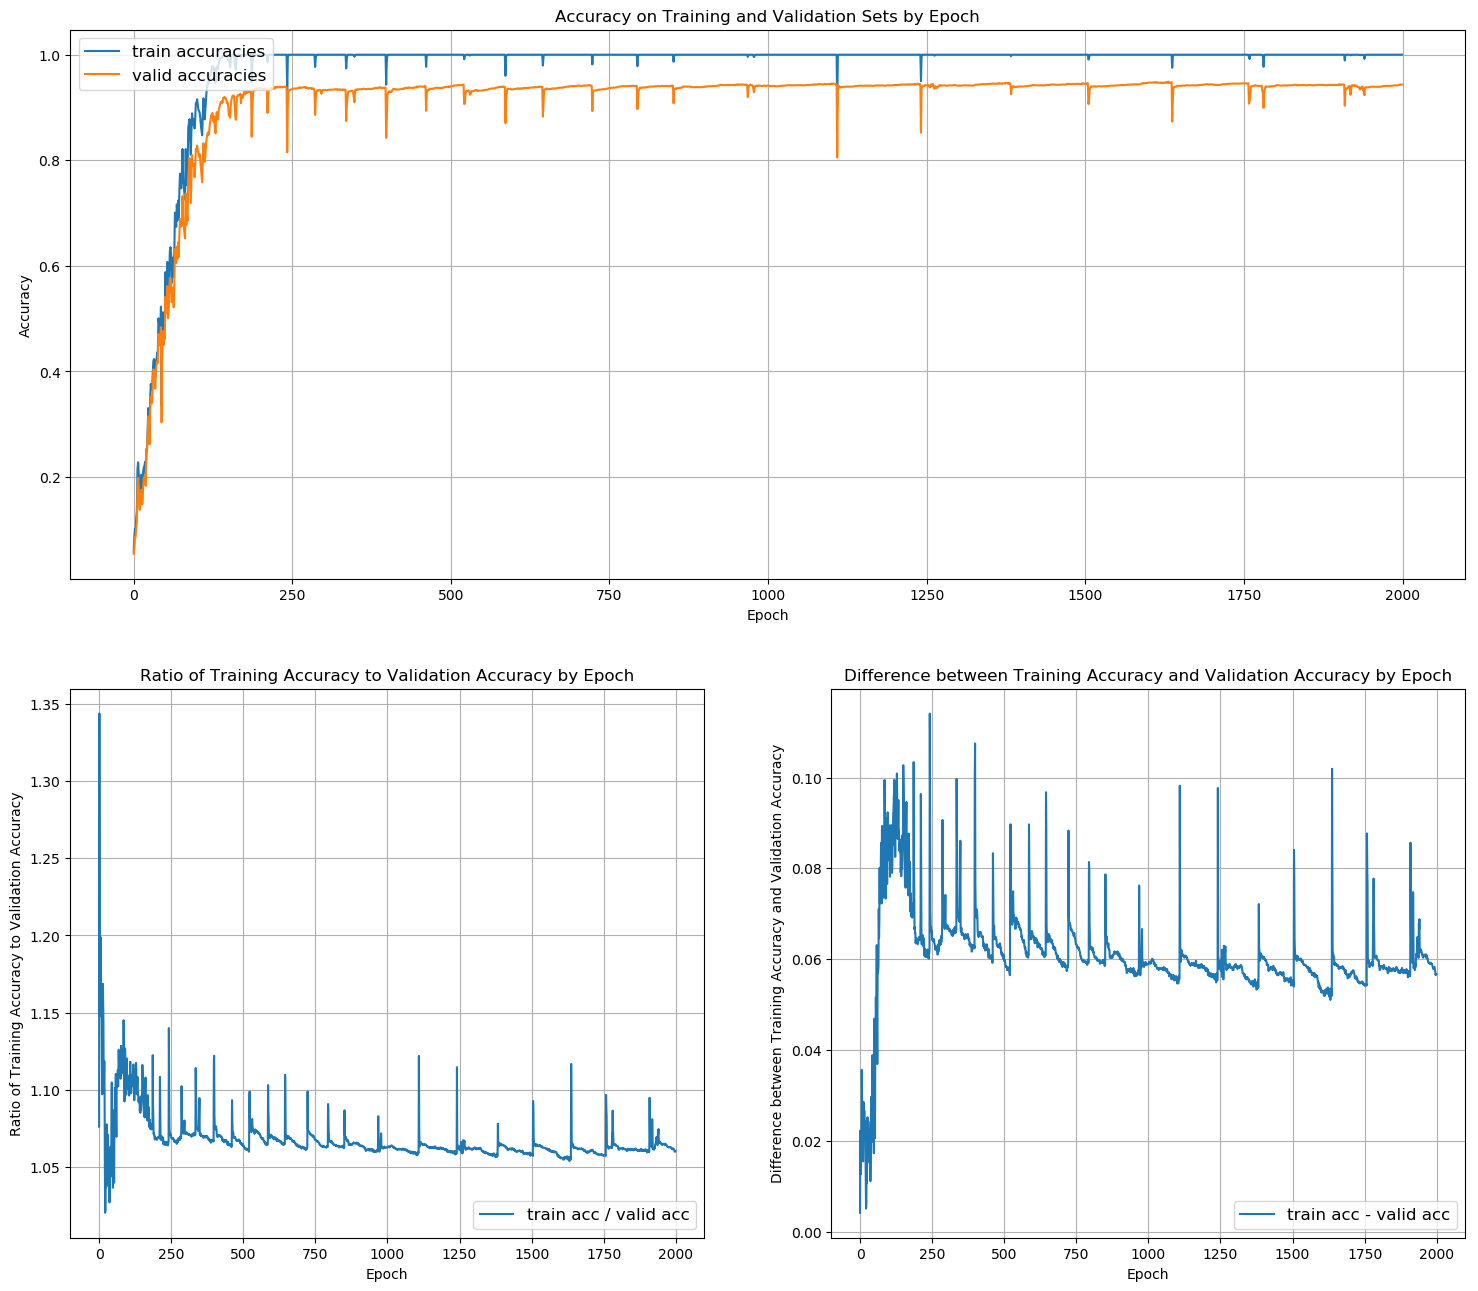

In [63]:

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(211)

plt.plot(train_accuracies, label='train accuracies')
plt.plot(valid_accuracies, label='valid accuracies')

plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper left', fontsize=12)

plt.title("Accuracy on Training and Validation Sets by Epoch")


# the following two graphs should provide warning of overfitting 
#  (indicated by greater accuracy on training data than validation data)
plt.subplot(223)

plt.plot(np.divide(np.array(train_accuracies),np.array(valid_accuracies)) , label='train acc / valid acc')

plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Ratio of Training Accuracy to Validation Accuracy")
plt.legend(loc='lower right', fontsize=12)

plt.title("Ratio of Training Accuracy to Validation Accuracy by Epoch")

plt.subplot(224)

plt.plot(np.array(train_accuracies) - np.array(valid_accuracies) , label='train acc - valid acc')

plt.xlabel("Epoch")
plt.ylabel("Difference between Training Accuracy and Validation Accuracy")
plt.legend(loc='lower right', fontsize=12)

plt.title("Difference between Training Accuracy and Validation Accuracy by Epoch")

plt.grid()

In [64]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './traff_sign_classifier')
    
    test_accuracy = calc_accuracy(batch_size, X_test_pp, y_test)
    
    print("test accuracy: ", test_accuracy)

test accuracy:  0.9304829772181296


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")